In [11]:
import pandas as pd
import numpy as np
data=pd.read_excel('1.4.5py.xlsx', sheet_name="Лист1")
data=data.iloc[:30]
data["T"]=data.m*9.8/1000
data

,n,nu,m,T
0,1,136.8,1023.3,10.02834
1,2,275.7,1023.3,10.02834
2,3,414.2,1023.3,10.02834
3,4,555.0,1023.3,10.02834
4,5,694.8,1023.3,10.02834
5,6,834.7,1023.3,10.02834
6,7,974.1,1023.3,10.02834
7,8,1117.0,1023.3,10.02834
8,9,1259.0,1023.3,10.02834
9,10,1402.0,1023.3,10.02834


In [10]:
print(data.transpose().style.to_latex(clines="all;index"))

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 29 \\
n & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 & 6.000000 & 7.000000 & 8.000000 & 9.000000 & 10.000000 & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 & 6.000000 & 7.000000 & 8.000000 & 9.000000 & 10.000000 & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 & 6.000000 & 7.000000 & 8.000000 & 9.000000 & 10.000000 \\
\cline{1-1}
nu & 136.800000 & 275.700000 & 414.200000 & 555.000000 & 694.800000 & 834.700000 & 974.100000 & 1117.000000 & 1259.000000 & 1402.000000 & 169.300000 & 340.300000 & 510.400000 & 681.400000 & 852.200000 & 1025.000000 & 1196.300000 & 1369.000000 & 1543.000000 & 1718.000000 & 187.100000 & 378.000000 & 564.400000 & 755.300000 & 941.200000 & 1163.000000 & 1321.000000 & 1519.000000 & 1705.000000 & 1905.000000 \\
\cline{1-1}
m & 1023.300000 & 1023.300000 & 1023

In [13]:
k1,a1=np.polyfit(data[data.m==1023.3]["n"], data[data.m==1023.3]["nu"], 1)
k2,a2=np.polyfit(data[data.m==1460.7]["n"], data[data.m==1460.7]["nu"], 1)
k3,a3=np.polyfit(data[data.m==1962.1]["n"], data[data.m==1962.1]["nu"], 1)
import matplotlib.pyplot as plt

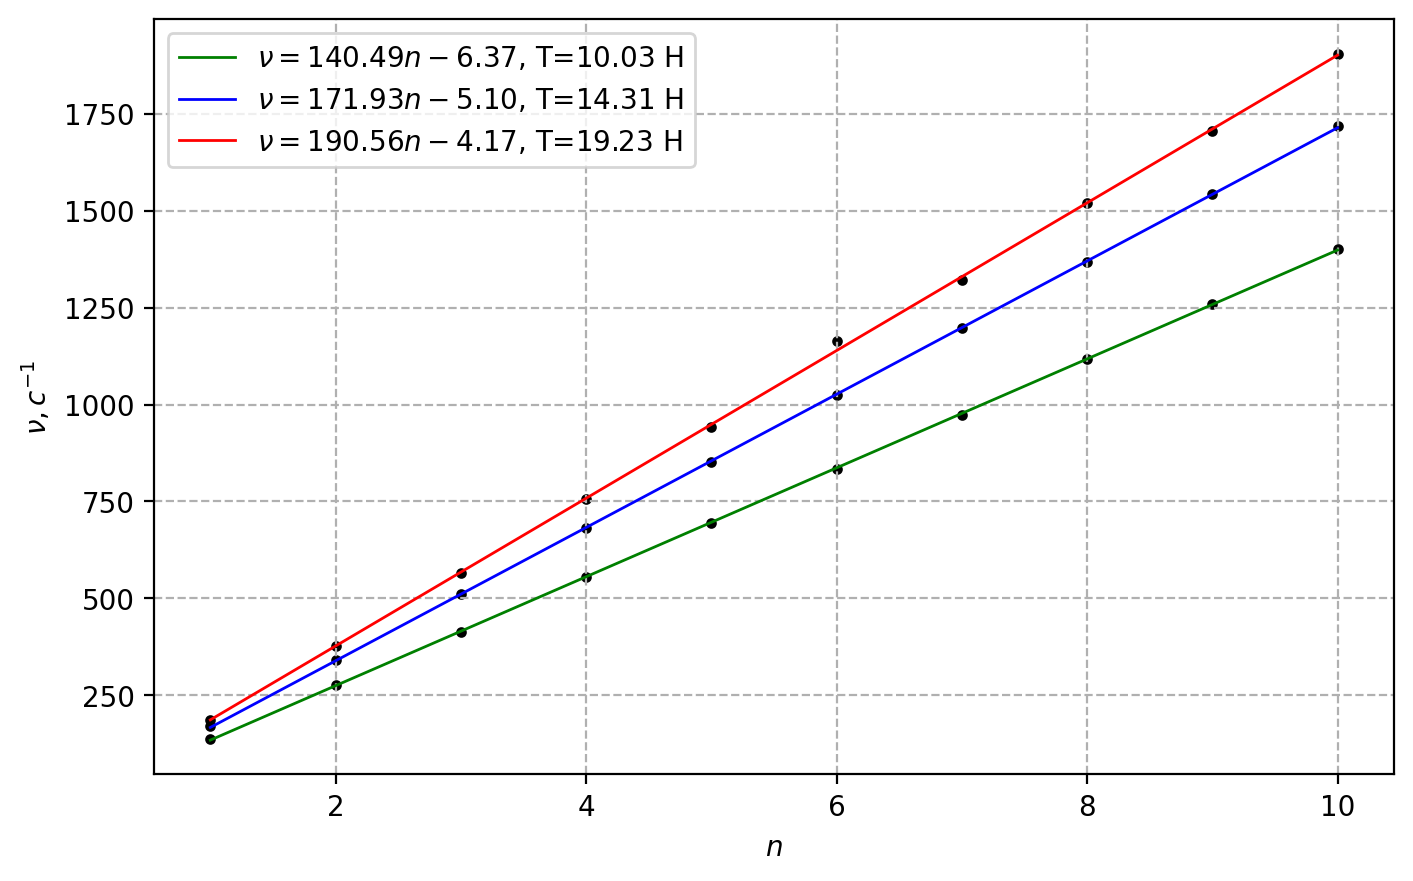

In [25]:
plt.figure(figsize=(8,5), dpi=200) # размер графика
plt.ylabel("$\\nu, c^{-1}$") # подписи к осям
plt.xlabel("$n$")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
x = np.array([0., 1]) # две точки аппроксимирующей прямой
plt.plot(data[data.m==1023.3]["n"], k1 * data[data.m==1023.3]["n"] + a1, "-g",linewidth=1, label="$ \\nu = %.2f n %.2f$, T=%.2f Н" % (k1, a1,10.028)) # аппроксимация
plt.scatter(data[data.m==1023.3]["n"], data[data.m==1023.3]["nu"], color="black",s=8, marker='o')
plt.plot(data[data.m==1460.7]["n"], k2 * data[data.m==1460.7]["n"] + a2, "-b",linewidth=1, label="$ \\nu = %.2f n %.2f$, T=%.2f Н" % (k2, a2, 14.315)) # аппроксимация
plt.scatter(data[data.m==1460.7]["n"], data[data.m==1460.7]["nu"], color="black",s=8, marker='o')
plt.plot(data[data.m==1962.1]["n"], k3 * data[data.m==1962.1]["n"] + a3, "-r",linewidth=1, label="$ \\nu = %.2f n %.2f$, T=%.2f Н" % (k3, a3, 19.229)) # аппроксимация
plt.scatter(data[data.m==1962.1]["n"],data[data.m==1962.1]["nu"], color="black",s=8, marker='o')
plt.legend() # легенда

In [50]:
#T=[10.028,14.315,19.229]
T=[10.02834,14.31486,19.22858]
k=[k1,k2,k3]
final=pd.DataFrame({'T' : T, "U":np.array(k)*2*0.5, "sig_r":[0,0,0], "sig_s":[0,0,0], "sig":[0,0,0]})
final

,T,U,sig_r,sig_s,sig
0,10.02834,140.491515,0,0,0
1,14.31486,171.925455,0,0,0
2,19.22858,190.557576,0,0,0


In [70]:
for i in range(len(T)):
    t=T[i]
    mu = np.mean(data[abs(data["T"]-t)<1]["nu"]) # средее
    mv = np.mean(data[abs(data["T"]-t)<1]["n"])
    mu2 = np.mean(data[abs(data["T"]-t)<1]["nu"]**2)
    mv2 = np.mean(data[abs(data["T"]-t)<1]["n"]**2) # средний квадрат
    muv = np.mean (data[abs(data["T"]-t)<1]["nu"] * data[abs(data["T"]-t)<1]["n"]) 
    final.loc[i,"sig_r"]=np.sqrt(1/(len(data[abs(data["T"]-t)<1]["nu"])-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k[i]**2 ) )
    final.loc[i,"sig_s"]=np.sqrt((0.1/50)**2+0.001**2)*k[i]
    final["sig"]=np.sqrt(final.sig_s**2+final.sig_r**2)
final

,T,U,sig_r,sig_s,sig
0,10.02834,140.491515,0.235777,0.314149,0.392785
1,14.31486,171.925455,0.242994,0.384437,0.454795
2,19.22858,190.557576,1.077702,0.426100,1.158880


In [72]:
print(final.style.to_latex(clines="all;data"))

\begin{tabular}{lrrrrr}
 & T & U & sig_r & sig_s & sig \\
0 & 10.028340 & 140.491515 & 0.235777 & 0.314149 & 0.392785 \\
\cline{1-6}
1 & 14.314860 & 171.925455 & 0.242994 & 0.384437 & 0.454795 \\
\cline{1-6}
2 & 19.228580 & 190.557576 & 1.077702 & 0.426100 & 1.158880 \\
\cline{1-6}
\end{tabular}



In [73]:
final["U2"]=final.U**2
final

,T,U,sig_r,sig_s,sig,U2
0,10.02834,140.491515,0.235777,0.314149,0.392785,19737.865830
1,14.31486,171.925455,0.242994,0.384437,0.454795,29558.361921
2,19.22858,190.557576,1.077702,0.426100,1.158880,36312.189679


In [74]:
k,a=np.polyfit(final["T"], final["U2"], 1)
print(k,a)

1791.1606854830857 2521.4526987718605


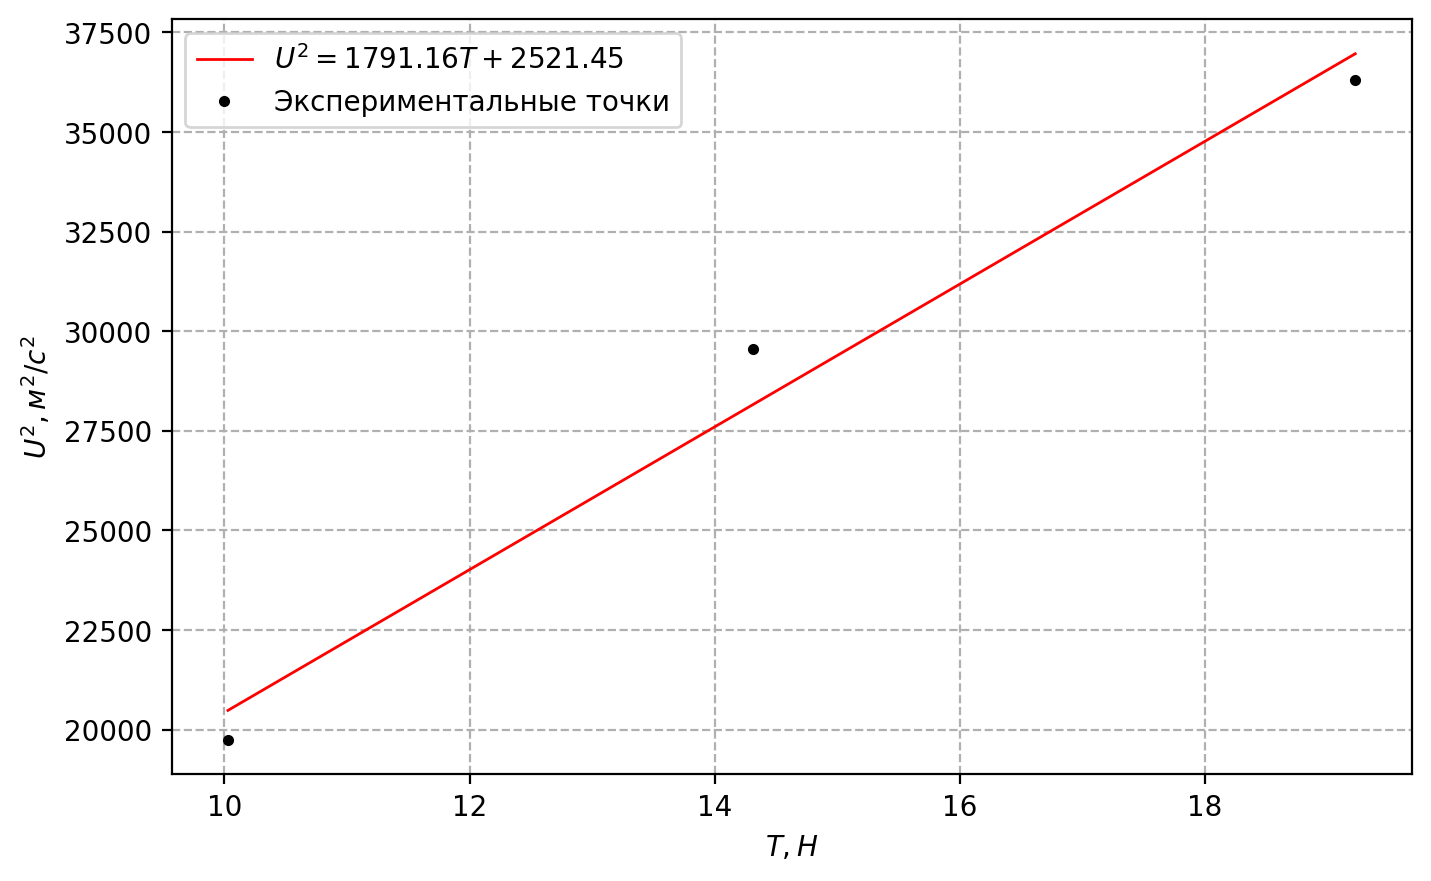

In [83]:
plt.figure(figsize=(8,5), dpi=200) # размер графика
plt.ylabel("$ U^2, м^2 / с^2 $") # подписи к осям
plt.xlabel("$T, Н$")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(final["T"], k * final["T"] + a, "-r",linewidth=1, label="$U^2 = %.2f T + %.2f$" % (k, a)) # аппроксимация
plt.errorbar(final["T"],final["U2"],  fmt="ok", label="Экспериментальные точки", ms=3) # точки с погрешностями
plt.legend() # легенда

In [86]:

mu = np.mean(final["U2"]) # средее
mv = np.mean(final["T"])
mu2 = np.mean(final["U2"]**2)
mv2 = np.mean(final["T"]**2) # средний квадрат
muv = np.mean (final["U2"] * final["T"]) 
print( np.sqrt(( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) ))

262.9438261655744
